<span style="font-size: 25px;">**Task-02**</span>

<span style="font-size: 14px;">**Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.**</span> 

<span style="font-size: 14px;">**Sample Dataset :- https://www.kaggle.com/c/titanic/data**</span> 

In [154]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [108]:
#Reading Dataset
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [109]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [111]:
#train Columns
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [112]:
#test columns
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [113]:
#Data types of each column
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [114]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [101]:
train.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [115]:
# Filter only the "Fare" and "Age" columns (numerical columns)
filtered_df = train[["Fare", "Age"]]

# Print the filtered DataFrame
print(filtered_df.head())

      Fare   Age
0   7.2500  22.0
1  71.2833  38.0
2   7.9250  26.0
3  53.1000  35.0
4   8.0500  35.0


In [116]:
filtered_df.describe

<bound method NDFrame.describe of         Fare   Age
0     7.2500  22.0
1    71.2833  38.0
2     7.9250  26.0
3    53.1000  35.0
4     8.0500  35.0
..       ...   ...
886  13.0000  27.0
887  30.0000  19.0
888  23.4500   NaN
889  30.0000  26.0
890   7.7500  32.0

[891 rows x 2 columns]>

<span style="font-size: 23px;">**Checking normality for variable age**</span>

<span style="font-size: 23px;">Visual inspection:</span>

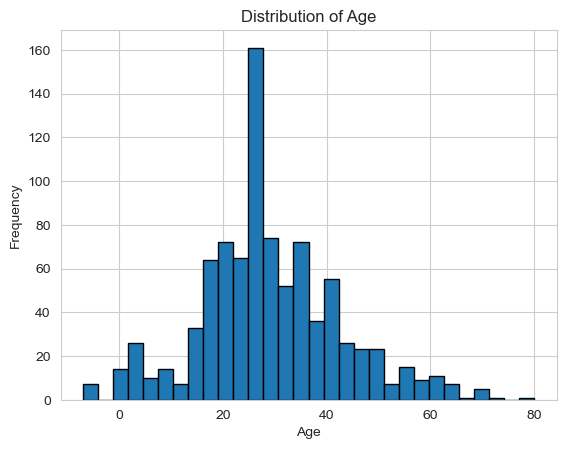

In [136]:
sns.set_style("whitegrid")
plt.hist(train['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<span style="font-size: 20px;">**=>The variable age follows a normal distribution(bell shaped).Note that the distribution is right-skewed then the mean might be influenced by these high age values, making it larger than the median. In such a case, using the median would be a better choice for imputation as it is less sensitive to outliers**</span>

<span style="font-size: 23px;">Q-Q Plot:</span>

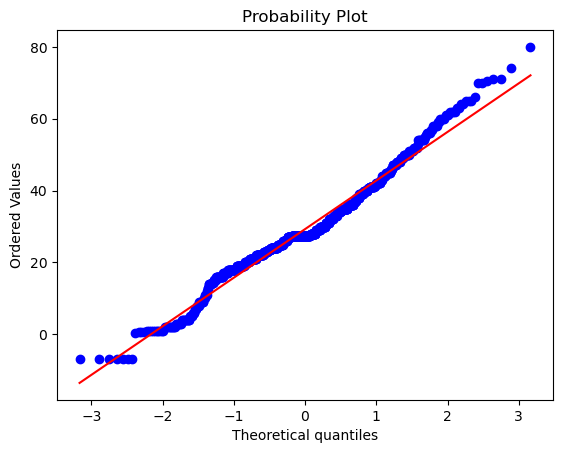

In [126]:
import scipy.stats as stats

stats.probplot(train['Age'].dropna(), dist="norm", plot=plt)
plt.show()

<span style="font-size: 20px;">**=>the two distributions being compared are similar, the points in the Q-Q plot approximately lie on the line y = x**</span>

<span style="font-size: 19px;">**=>>the variable "age" follows a normal distribution that is right-skewed 
. hence, we can use either predictive imputation with regression or median to impute missing values, to ensure accuracy**</span>

<span style="font-size: 26px;">**Predictive Imputation of Missing Ages in the training set Using Regression**</span>

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select relevant features (excluding "Age" and rows with missing "Age")
X = train.dropna(subset=["Age"])[["Fare", "Pclass", "SibSp", "Parch"]]
y = train.dropna(subset=["Age"])["Age"]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict missing ages
missing_age_indices = train[train["Age"].isnull()].index
predicted_ages = reg_model.predict(train.loc[missing_age_indices, ["Fare", "Pclass", "SibSp", "Parch"]])

# Fill in missing ages with predicted values
train.loc[missing_age_indices, "Age"] = predicted_ages

In [118]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,27.485136,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [119]:
#checking for NaN Values
def null_table(train, test):
    print("Training Data Frame")
    print(pd.isnull(train).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(test).sum())

null_table(train, test)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [120]:
#removing the unnecessary columns from training and testing datasets
train.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
test.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

In [121]:
null_table(train, test)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


<span style="font-size: 26px;">**Dealing with the rest of the missing values using the median** </span>

In [122]:
test["Age"].fillna(test["Age"].median(), inplace = True) 
train["Embarked"].fillna("S", inplace = True)
test["Fare"].fillna(test["Fare"].median(), inplace = True)

null_table(train, test)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [123]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,27.485136,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,C


In [124]:
test.tail(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
398,1290,3,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,7.7750,S
399,1291,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,7.7333,Q
400,1292,1,"Bonnell, Miss. Caroline",female,30.0,0,0,164.8667,S
401,1293,2,"Gale, Mr. Harry",male,38.0,1,0,21.0000,S
402,1294,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,59.4000,C
403,1295,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,47.1000,S
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,27.7208,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,13.8625,C
406,1298,2,"Ware, Mr. William Jeffery",male,23.0,1,0,10.5000,S
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,211.5000,C


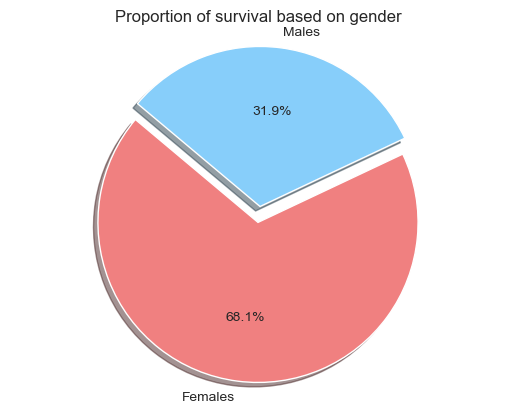

Total people survived : 342
Total survived females:
233
Total survived males:
109


In [141]:
import matplotlib.pyplot as plt

# Calculate total number of survivors and their proportions
total_survived_females = train[train.Sex == "female"]["Survived"].sum()
total_survived_males = train[train.Sex == "male"]["Survived"].sum()

# Calculate proportions
female_proportion = total_survived_females/(total_survived_females + total_survived_males)
male_proportion = total_survived_males/(total_survived_females + total_survived_males)

# Data to plot
labels = 'Females', 'Males'
sizes = [female_proportion, male_proportion]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Proportion of survival based on gender")
plt.show()

print("Total people survived : " + str((total_survived_females + total_survived_males)))
print("Total survived females:") 
print(total_survived_females)
print("Total survived males:")
print(total_survived_males)


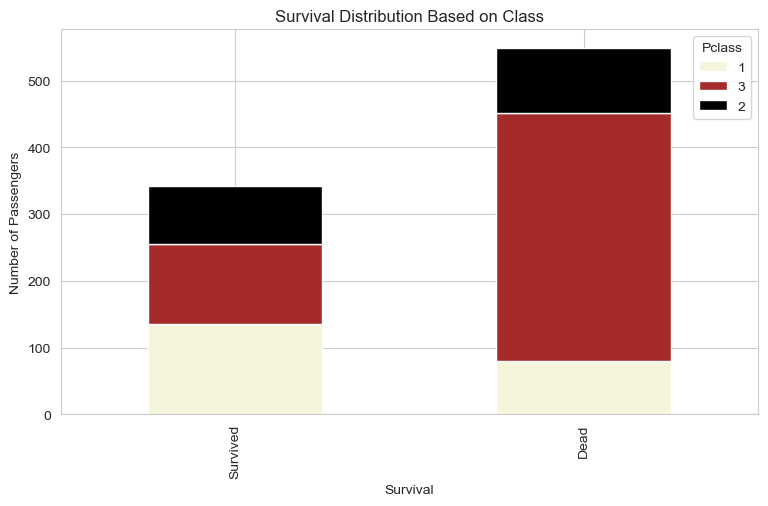

In [151]:
# Calculate the number of survivors and non-survivors in each class
survived = train[train['Survived']==1]['Pclass'].value_counts()
dead = train[train['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
# Define your color list
colors = ['beige', 'brown', 'black']
# Plot stacked bar chart
df.plot(kind='bar', stacked=True, figsize=(9,5), color=colors)
plt.title("Survival Distribution Based on Class")
plt.xlabel("Survival")
plt.ylabel("Number of Passengers")
plt.show()

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

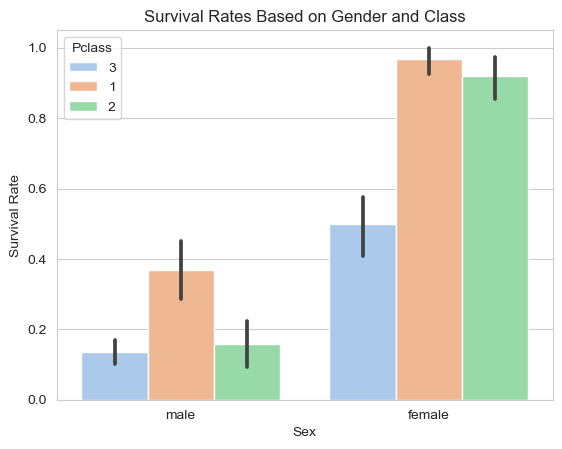

In [161]:
# Convert 'Pclass' to string type
train['Pclass'] = train['Pclass'].astype(str)
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train, palette="pastel")
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

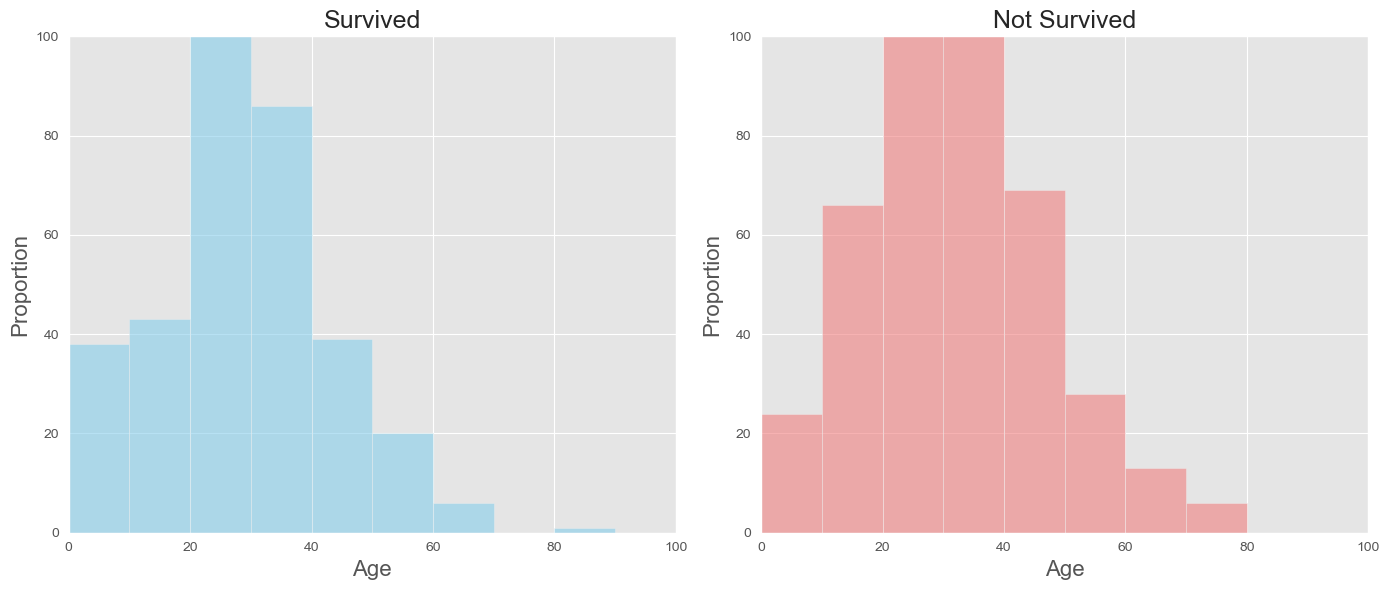

In [168]:
# Define the style
plt.style.use('ggplot')

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Define common parameters for the plots
bins = range(0, 100, 10)
alpha = 0.6
color_survived = 'skyblue'
color_not_survived = 'lightcoral'

# Plot data
axes[0].hist(survived, bins=bins, alpha=alpha, color=color_survived)
axes[1].hist(not_survived, bins=bins, alpha=alpha, color=color_not_survived)

# Set titles, labels and limits
axes[0].set_title('Survived', fontsize=18)
axes[1].set_title('Not Survived', fontsize=18)
for ax in axes:
    ax.set_xlabel('Age', fontsize=16)
    ax.set_ylabel('Proportion', fontsize=16)
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()
